In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.6.2.3
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ef164de9aa5c6be5351ea578c2778c2e


In [4]:
# Create a set of random latitude and longitude combinations.USe 'zip' function used to pair things
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.6.1.5
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


618

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.6.2.6
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | ancud
Processing Record 3 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 13 | beyneu
Processing Record 5 of Set 13 | mogadishu
Processing Record 6 of Set 13 | krasnoselkup
Processing Record 7 of Set 13 | ostrovnoy
Processing Record 8 of Set 13 | hermanus
Processing Record 9 of Set 13 | pevek
Processing Record 10 of Set 13 | airai
Processing Record 11 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 13 | pangnirtung
Processing Record 13 of Set 13 | vilcun
Processing Record 14 of Set 13 | jamestown
Processing Record 15 of Set 13 | mosetse
Processing Record 16 of Set 13 | waddan
Processing Record 17 of Set 13 | phillipsburg
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | rocha
Processing Record 20 of Set 13 | alofi
Processing Record 21 of Set 13 | bluff
Processing Record 

Processing Record 35 of Set 16 | sisimiut
Processing Record 36 of Set 16 | petaluma
Processing Record 37 of Set 16 | thompson
Processing Record 38 of Set 16 | skibbereen
Processing Record 39 of Set 16 | azul
Processing Record 40 of Set 16 | ahipara
Processing Record 41 of Set 16 | taolanaro
City not found. Skipping...
Processing Record 42 of Set 16 | linxia
Processing Record 43 of Set 16 | kasongo-lunda
Processing Record 44 of Set 16 | asosa
Processing Record 45 of Set 16 | zaraza
Processing Record 46 of Set 16 | kobryn
Processing Record 47 of Set 16 | nikolskoye
Processing Record 48 of Set 16 | ewa beach
Processing Record 49 of Set 16 | loandjili
Processing Record 50 of Set 16 | bubaque
Processing Record 1 of Set 17 | ponta do sol
Processing Record 2 of Set 17 | clyde river
Processing Record 3 of Set 17 | raudeberg
Processing Record 4 of Set 17 | rabo de peixe
Processing Record 5 of Set 17 | sorong
Processing Record 6 of Set 17 | dianopolis
City not found. Skipping...
Processing Recor

Processing Record 25 of Set 20 | grand gaube
Processing Record 26 of Set 20 | shunyi
Processing Record 27 of Set 20 | latung
Processing Record 28 of Set 20 | camalu
Processing Record 29 of Set 20 | paamiut
Processing Record 30 of Set 20 | sabha
Processing Record 31 of Set 20 | kedrovyy
Processing Record 32 of Set 20 | kodinsk
Processing Record 33 of Set 20 | krasnyy chikoy
Processing Record 34 of Set 20 | sarakhs
Processing Record 35 of Set 20 | podgornoye
Processing Record 36 of Set 20 | tilichiki
Processing Record 37 of Set 20 | kaeo
Processing Record 38 of Set 20 | margate
Processing Record 39 of Set 20 | jalu
Processing Record 40 of Set 20 | sibolga
Processing Record 41 of Set 20 | bandarbeyla
Processing Record 42 of Set 20 | fortuna
Processing Record 43 of Set 20 | duluth
Processing Record 44 of Set 20 | lavrentiya
Processing Record 45 of Set 20 | manhuacu
Processing Record 46 of Set 20 | tessalit
Processing Record 47 of Set 20 | misratah
Processing Record 48 of Set 20 | oksovskiy

Processing Record 16 of Set 24 | ha giang
Processing Record 17 of Set 24 | tecpan
Processing Record 18 of Set 24 | adeje
Processing Record 19 of Set 24 | neuquen
Processing Record 20 of Set 24 | laguna
Processing Record 21 of Set 24 | moundsville
Processing Record 22 of Set 24 | sonamukhi
Processing Record 23 of Set 24 | darab
Processing Record 24 of Set 24 | high level
Processing Record 25 of Set 24 | ankara
Processing Record 26 of Set 24 | stoyba
City not found. Skipping...
Processing Record 27 of Set 24 | mana
Processing Record 28 of Set 24 | tarakan
Processing Record 29 of Set 24 | jenbach
Processing Record 30 of Set 24 | maralal
Processing Record 31 of Set 24 | bar harbor
Processing Record 32 of Set 24 | voi
Processing Record 33 of Set 24 | harnosand
Processing Record 34 of Set 24 | beringovskiy
Processing Record 35 of Set 24 | waingapu
Processing Record 36 of Set 24 | pakokku
Processing Record 37 of Set 24 | obo
Processing Record 38 of Set 24 | at-bashi
Processing Record 39 of Se

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame. 6.2.7
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,78.80,94,90,6.91,TO,2021-02-02 21:39:18
1,Ancud,-41.8697,-73.8203,69.80,56,0,8.05,CL,2021-02-02 21:42:37
2,Beyneu,45.3167,55.2000,39.87,66,81,13.00,KZ,2021-02-02 21:47:10
3,Mogadishu,2.0371,45.3438,75.51,78,7,21.97,SO,2021-02-02 21:42:24
4,Krasnoselkup,65.7000,82.4667,-0.74,93,91,9.22,RU,2021-02-02 21:42:04
5,Ostrovnoy,68.0531,39.5131,25.43,95,100,18.41,RU,2021-02-02 21:42:38
6,Hermanus,-34.4187,19.2345,63.00,89,0,6.87,ZA,2021-02-02 21:42:06
7,Pevek,69.7008,170.3133,8.19,92,100,10.65,RU,2021-02-02 21:43:02
8,Airai,-8.9266,125.4092,61.54,100,100,1.77,TL,2021-02-02 21:41:46
9,Pangnirtung,66.1451,-65.7125,-22.00,57,20,4.61,CA,2021-02-02 21:43:36


In [17]:
# Reorder the DataFrame
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-02-02 21:39:18,-21.2000,-175.2000,78.80,94,90,6.91
1,Ancud,CL,2021-02-02 21:42:37,-41.8697,-73.8203,69.80,56,0,8.05
2,Beyneu,KZ,2021-02-02 21:47:10,45.3167,55.2000,39.87,66,81,13.00
3,Mogadishu,SO,2021-02-02 21:42:24,2.0371,45.3438,75.51,78,7,21.97
4,Krasnoselkup,RU,2021-02-02 21:42:04,65.7000,82.4667,-0.74,93,91,9.22
5,Ostrovnoy,RU,2021-02-02 21:42:38,68.0531,39.5131,25.43,95,100,18.41
6,Hermanus,ZA,2021-02-02 21:42:06,-34.4187,19.2345,63.00,89,0,6.87
7,Pevek,RU,2021-02-02 21:43:02,69.7008,170.3133,8.19,92,100,10.65
8,Airai,TL,2021-02-02 21:41:46,-8.9266,125.4092,61.54,100,100,1.77
9,Pangnirtung,CA,2021-02-02 21:43:36,66.1451,-65.7125,-22.00,57,20,4.61


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

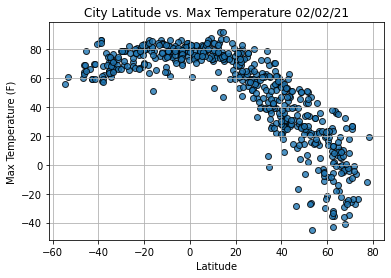

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

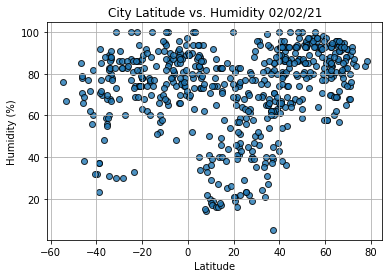

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

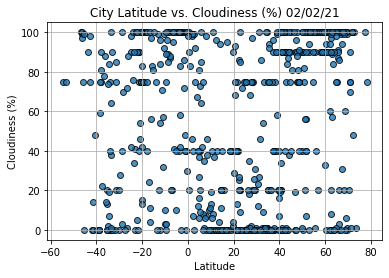

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()